In [1]:
import pickle

file_name = 'my_dic.pkl'
    
# Open the file and load its content
with open(file_name, 'rb') as file:
    data_dict = pickle.load(file)
    
# Print all the keys
print("Combined dictionary keys:", len(data_dict.keys()))

Combined dictionary keys: 400


In [2]:
data_dict.keys()

dict_keys(['File_0', 'File_1', 'File_2', 'File_3', 'File_4', 'File_5', 'File_6', 'File_7', 'File_8', 'File_9', 'File_10', 'File_11', 'File_12', 'File_13', 'File_14', 'File_15', 'File_16', 'File_17', 'File_18', 'File_19', 'File_20', 'File_21', 'File_22', 'File_23', 'File_24', 'File_25', 'File_26', 'File_27', 'File_28', 'File_29', 'File_30', 'File_31', 'File_32', 'File_33', 'File_34', 'File_35', 'File_36', 'File_37', 'File_38', 'File_39', 'File_40', 'File_41', 'File_42', 'File_43', 'File_44', 'File_45', 'File_46', 'File_47', 'File_48', 'File_49', 'File_50', 'File_51', 'File_52', 'File_53', 'File_54', 'File_55', 'File_56', 'File_57', 'File_58', 'File_59', 'File_60', 'File_61', 'File_62', 'File_63', 'File_64', 'File_65', 'File_66', 'File_67', 'File_68', 'File_69', 'File_70', 'File_71', 'File_72', 'File_73', 'File_74', 'File_75', 'File_76', 'File_77', 'File_78', 'File_79', 'File_80', 'File_81', 'File_82', 'File_83', 'File_84', 'File_85', 'File_86', 'File_87', 'File_88', 'File_89', 'File_90'

In [3]:
data_dict['File_144']

{'Channel_1': {'Operation': 'Sequential',
  'Cube 1 Mode': 'Conduction1',
  'Cube 2 Mode': 'Keyhole1',
  'segments': [array([ 1.881256 ,  0.4908752, -2.017059 , ...,  1.261749 ,  2.152557 ,
           1.882172 ]),
   array([ 1.717224 ,  1.48407  ,  0.771637 , ..., -0.1409912,  0.6596375,
           1.547241 ])],
  'boundaries': (array([ 19557, 706880]), array([ 502985, 1377629])),
  'avg_length': 577089.5,
  'std_dev': 93660.5,
  'num_segments': 2},
 'Channel_2': {'Operation': 'Sequential',
  'Cube 1 Mode': 'Conduction1',
  'Cube 2 Mode': 'Keyhole1',
  'segments': [array([ 1.628876 ,  1.441345 , -1.601868 , ...,  0.3134155,  1.319427 ,
           1.571503 ]),
   array([1.58432  , 1.397705 , 1.246338 , ..., 0.4893494, 1.133118 ,
          1.5625   ])],
  'boundaries': (array([ 19537, 706735]), array([ 501810, 1376337])),
  'avg_length': 575938.5,
  'std_dev': 93664.5,
  'num_segments': 2},
 'Channel_3': {'Operation': 'Sequential',
  'Cube 1 Mode': 'Conduction1',
  'Cube 2 Mode': 'Keyhol

In [4]:
sequential_dict = {}
simultaneous_dict = {}

# Loop over all files
for file_name, file_data in data_dict.items():
    print(f"Processing {file_name}...")
    for channel_name, channel_data in file_data.items():

        segments = channel_data['segments']
        mode1 = channel_data['Cube 1 Mode']
        mode2 = channel_data['Cube 2 Mode']

        # Check operation type and update the respective dictionary
        if channel_data['Operation'] == 'Sequential':
            if file_name not in sequential_dict:
                sequential_dict[file_name] = {'Cube 1 Mode': mode1, 'Cube 2 Mode': mode2, 'channels': {}}
            
            # Only update channel specific data under the 'channels' sub-dictionary
            sequential_dict[file_name]['channels'][channel_name] = {'segment': segments}

        elif channel_data['Operation'] == 'Simultaneous':
            if file_name not in simultaneous_dict:
                simultaneous_dict[file_name] = {'Cube 1 Mode': mode1, 'Cube 2 Mode': mode2, 'channels': {}}
            
            # Only update channel specific data under the 'channels' sub-dictionary
            simultaneous_dict[file_name]['channels'][channel_name] = {'segment': segments}


Processing File_0...
Processing File_1...
Processing File_2...
Processing File_3...
Processing File_4...
Processing File_5...
Processing File_6...
Processing File_7...
Processing File_8...
Processing File_9...
Processing File_10...
Processing File_11...
Processing File_12...
Processing File_13...
Processing File_14...
Processing File_15...
Processing File_16...
Processing File_17...
Processing File_18...
Processing File_19...
Processing File_20...
Processing File_21...
Processing File_22...
Processing File_23...
Processing File_24...
Processing File_25...
Processing File_26...
Processing File_27...
Processing File_28...
Processing File_29...
Processing File_30...
Processing File_31...
Processing File_32...
Processing File_33...
Processing File_34...
Processing File_35...
Processing File_36...
Processing File_37...
Processing File_38...
Processing File_39...
Processing File_40...
Processing File_41...
Processing File_42...
Processing File_43...
Processing File_44...
Processing File_45..

In [5]:
# Create iterators for both dictionaries
sequential_iter = iter(sequential_dict.items())
simultaneous_iter = iter(simultaneous_dict.items())

# Loop until we run out of items in either dictionary
while True:
    try:
        # Get the next item from both dictionaries
        seq_file, seq_data = next(sequential_iter)
        sim_file, sim_data = next(simultaneous_iter)

        # Compare Cube 1 Mode and Cube 2 Mode between the sequential and simultaneous file
        seq_mode1, seq_mode2 = seq_data['Cube 1 Mode'], seq_data['Cube 2 Mode']
        sim_mode1, sim_mode2 = sim_data['Cube 1 Mode'], sim_data['Cube 2 Mode']

        # Check if modes correspond
        modes_correspond = (seq_mode1 == sim_mode1) and (seq_mode2 == sim_mode2)
        print(f"Comparing {seq_file} (Sequential) and {sim_file} (Simultaneous): Modes correspond? {modes_correspond}")

    except StopIteration:
        # One of the dictionaries has been fully iterated
        break


Comparing File_0 (Sequential) and File_10 (Simultaneous): Modes correspond? True
Comparing File_1 (Sequential) and File_11 (Simultaneous): Modes correspond? True
Comparing File_2 (Sequential) and File_12 (Simultaneous): Modes correspond? True
Comparing File_3 (Sequential) and File_13 (Simultaneous): Modes correspond? True
Comparing File_4 (Sequential) and File_14 (Simultaneous): Modes correspond? True
Comparing File_5 (Sequential) and File_15 (Simultaneous): Modes correspond? True
Comparing File_6 (Sequential) and File_16 (Simultaneous): Modes correspond? True
Comparing File_7 (Sequential) and File_17 (Simultaneous): Modes correspond? True
Comparing File_8 (Sequential) and File_18 (Simultaneous): Modes correspond? True
Comparing File_9 (Sequential) and File_19 (Simultaneous): Modes correspond? True
Comparing File_20 (Sequential) and File_30 (Simultaneous): Modes correspond? True
Comparing File_21 (Sequential) and File_31 (Simultaneous): Modes correspond? True
Comparing File_22 (Sequent

In [6]:
sequential_dict['File_0']

{'Cube 1 Mode': 'Conduction 2',
 'Cube 2 Mode': 'Conduction 2',
 'channels': {'Channel_1': {'segment': [array([ 1.631012 ,  1.408844 ,  1.222229 , ..., -0.266571 ,  0.9873962,
            1.666107 ]),
    array([1.638641 , 1.416626 , 1.22818  , ..., 0.7533264, 1.670532 ,
           1.550293 ])]},
  'Channel_2': {'segment': [array([1.632233 , 1.443176 , 1.282196 , ..., 0.1829529, 0.5187988,
           1.531677 ]),
    array([1.618042, 1.433105, 1.274261, ..., 0.852356, 1.535187, 1.585083])]},
  'Channel_3': {'segment': [array([ 0.00335693,  0.00610352, -0.00152588, ..., -0.00305176,
           -0.00762939, -0.00671387]),
    array([-0.05386353, -0.04058838, -0.00991821, ...,  0.00106811,
           -0.00350952, -0.00076294])]}}}

In [7]:
import numpy as np

def adjust_segments(segments, target_length):
    adjusted_segments = []
    for segment in segments:
        current_length = segment.shape[0]
        if current_length < target_length:
            # Pad the segment with zeros
            padding = np.zeros(target_length - current_length)
            new_segment = np.concatenate((segment, padding))
        elif current_length > target_length:
            # Trim the segment
            new_segment = segment[:target_length]
        else:
            # No adjustment needed
            new_segment = segment
        adjusted_segments.append(new_segment)
    return adjusted_segments

# Initialize the result dictionary
result_dict = {}

# Create iterators for both dictionaries
sequential_iter = iter(sequential_dict.items())
simultaneous_iter = iter(simultaneous_dict.items())

try:
    while True:
        # Extract file names and data
        seq_file, seq_data = next(sequential_iter)
        sim_file, sim_data = next(simultaneous_iter)

        # Initialize storage for segments and their descriptions
        seq_segments = []
        seq_descriptions = []
        sim_segments = []
        sim_descriptions = []

        # Process sequential data
        for channel_name, channel_data in seq_data['channels'].items():
            for idx, seg in enumerate(channel_data['segment']):
                seq_segments.append(seg)
                mode = seq_data['Cube 1 Mode'] if idx == 0 else seq_data['Cube 2 Mode']
                seq_descriptions.append(f"Channel: {channel_name}, Mode: {mode}")

        # Process simultaneous data
        for channel_name, channel_data in sim_data['channels'].items():
            sim_segments.extend(channel_data['segment'])
            # Each segment in simultaneous mode gets both Cube 1 and Cube 2 Mode descriptions
            description = f"Channel: {channel_name}, Modes: {sim_data['Cube 1 Mode']} & {sim_data['Cube 2 Mode']}"
            sim_descriptions.extend([description] * len(channel_data['segment']))

        # Determine the maximum segment length
        max_length = max(max(len(seg) for seg in seq_segments), max(len(seg) for seg in sim_segments))

        # Adjust segment lengths
        seq_segments_adjusted = adjust_segments(seq_segments, max_length)
        sim_segments_adjusted = adjust_segments(sim_segments, max_length)

        # Populate the result dictionary
        result_dict[(seq_file, sim_file)] = {
            'Sequential': seq_segments_adjusted,
            'Sequential Description': seq_descriptions,
            'Simultaneous': sim_segments_adjusted,
            'Simultaneous Description': sim_descriptions,
        }

except StopIteration:
    # Reached the end of at least one of the dictionaries
    pass


In [8]:
result_dict[('File_144', 'File_159')]

{'Sequential': [array([ 1.881256 ,  0.4908752, -2.017059 , ...,  0.       ,  0.       ,
          0.       ]),
  array([1.717224, 1.48407 , 0.771637, ..., 0.      , 0.      , 0.      ]),
  array([ 1.628876,  1.441345, -1.601868, ...,  0.      ,  0.      ,
          0.      ]),
  array([1.58432 , 1.397705, 1.246338, ..., 0.      , 0.      , 0.      ]),
  array([ 0.00610352,  0.00488281, -0.00457764, ...,  0.        ,
          0.        ,  0.        ]),
  array([-0.02319336,  0.00183106,  0.03173828, ...,  0.        ,
          0.        ,  0.        ])],
 'Sequential Description': ['Channel: Channel_1, Mode: Conduction1',
  'Channel: Channel_1, Mode: Keyhole1',
  'Channel: Channel_2, Mode: Conduction1',
  'Channel: Channel_2, Mode: Keyhole1',
  'Channel: Channel_3, Mode: Conduction1',
  'Channel: Channel_3, Mode: Keyhole1'],
 'Simultaneous': [array([1.705475 , 1.473236 , 1.27533  , ..., 0.5723572, 1.611176 ,
         1.655426 ]),
  array([1.617432, 1.434174, 1.272888, ..., 0.      , 0.

In [9]:
for (seq_file, sim_file), data in result_dict.items():
    print(f"Processing ({seq_file}, {sim_file}),")
    
    # Sequential segments
    print("sequential:")
    seq_segments = data['Sequential']
    seq_descriptions = data['Sequential Description']
    for idx, (segment, description) in enumerate(zip(seq_segments, seq_descriptions), start=1):
        print(f"Segment {idx}: len {len(segment)}, description: {description}")
    print(f"Found a total {len(seq_segments)} segments")
    
    # Simultaneous segments
    print("simultaneous:")
    sim_segments = data['Simultaneous']
    sim_descriptions = data['Simultaneous Description']
    # Assuming sim_segments is a list for uniformity; adjust if it's a single array
    for idx, (segment, description) in enumerate(zip(sim_segments, sim_descriptions), start=1):
        print(f"Segment {idx}: len {len(segment)}, description: {description}")
    print(f"Found a total {len(sim_segments)} segments")
    print("-----")


Processing (File_0, File_10),
sequential:
Segment 1: len 430816, description: Channel: Channel_1, Mode: Conduction 2
Segment 2: len 430816, description: Channel: Channel_1, Mode: Conduction 2
Segment 3: len 430816, description: Channel: Channel_2, Mode: Conduction 2
Segment 4: len 430816, description: Channel: Channel_2, Mode: Conduction 2
Segment 5: len 430816, description: Channel: Channel_3, Mode: Conduction 2
Segment 6: len 430816, description: Channel: Channel_3, Mode: Conduction 2
Found a total 6 segments
simultaneous:
Segment 1: len 430816, description: Channel: Channel_1, Modes: Conduction 2 & Conduction 2
Segment 2: len 430816, description: Channel: Channel_2, Modes: Conduction 2 & Conduction 2
Segment 3: len 430816, description: Channel: Channel_3, Modes: Conduction 2 & Conduction 2
Found a total 3 segments
-----
Processing (File_1, File_11),
sequential:
Segment 1: len 428501, description: Channel: Channel_1, Mode: Conduction 2
Segment 2: len 428501, description: Channel: Cha

In [10]:
import torch

pytorch_database = {}

for (file_i, file_j), data in result_dict.items():
    # Sequential segments
    seq_segments = [torch.from_numpy(seg) for seg in data['Sequential']]
    N = seq_segments[0].shape[0]
    num_channels = len(seq_segments) // 2

    # Create uninitialized tensors to fill in later
    seq_tensor = torch.empty((2, num_channels, N))
    sim_tensor = torch.empty((1, num_channels, N))

    # Explicitly assigning segments to the sequential tensor
    seq_tensor[0, 0, :] = seq_segments[0]
    seq_tensor[1, 0, :] = seq_segments[1]
    seq_tensor[0, 1, :] = seq_segments[2]
    seq_tensor[1, 1, :] = seq_segments[3]
    seq_tensor[0, 2, :] = seq_segments[4]
    seq_tensor[1, 2, :] = seq_segments[5]

    # Assuming there are exactly 3 segments for the simultaneous case
    sim_segments = [torch.from_numpy(seg) for seg in data['Simultaneous']]
    sim_tensor[0, 0, :] = sim_segments[0]
    sim_tensor[0, 1, :] = sim_segments[1]
    sim_tensor[0, 2, :] = sim_segments[2]

    # Add to pytorch_database
    pytorch_database[(file_i, file_j)] = {
        'sequential': seq_tensor,
        'simultaneous': sim_tensor,
        'mode': data['Simultaneous Description'][0].split(':')[-1]  
    }


In [11]:
pytorch_database[('File_144', 'File_159')]

{'sequential': tensor([[[ 1.8813e+00,  4.9088e-01, -2.0171e+00,  ...,  0.0000e+00,
            0.0000e+00,  0.0000e+00],
          [ 1.6289e+00,  1.4413e+00, -1.6019e+00,  ...,  0.0000e+00,
            0.0000e+00,  0.0000e+00],
          [ 6.1035e-03,  4.8828e-03, -4.5776e-03,  ...,  0.0000e+00,
            0.0000e+00,  0.0000e+00]],
 
         [[ 1.7172e+00,  1.4841e+00,  7.7164e-01,  ...,  0.0000e+00,
            0.0000e+00,  0.0000e+00],
          [ 1.5843e+00,  1.3977e+00,  1.2463e+00,  ...,  0.0000e+00,
            0.0000e+00,  0.0000e+00],
          [-2.3193e-02,  1.8311e-03,  3.1738e-02,  ...,  0.0000e+00,
            0.0000e+00,  0.0000e+00]]]),
 'simultaneous': tensor([[[1.7055e+00, 1.4732e+00, 1.2753e+00,  ..., 5.7236e-01,
           1.6112e+00, 1.6554e+00],
          [1.6174e+00, 1.4342e+00, 1.2729e+00,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          [6.1035e-03, 6.4087e-03, 7.6294e-04,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00]]]),
 'mode': ' Condu

In [12]:
for key, data in pytorch_database.items():
    # Extract the tensors and mode for the current key
    seq_tensor = data['sequential']
    sim_tensor = data['simultaneous']
    mode = data['mode']
    
    # Print the details
    print(f"Processing key: {key}, mode: {mode}")
    print(f"sequential, shape: {seq_tensor.shape}")
    print(f"simultaneous, shape: {sim_tensor.shape}\n")
    print('---'*10)

Processing key: ('File_0', 'File_10'), mode:  Conduction 2 & Conduction 2
sequential, shape: torch.Size([2, 3, 430816])
simultaneous, shape: torch.Size([1, 3, 430816])

------------------------------
Processing key: ('File_1', 'File_11'), mode:  Conduction 2 & Conduction 2
sequential, shape: torch.Size([2, 3, 428501])
simultaneous, shape: torch.Size([1, 3, 428501])

------------------------------
Processing key: ('File_2', 'File_12'), mode:  Conduction 2 & Conduction 2
sequential, shape: torch.Size([2, 3, 430752])
simultaneous, shape: torch.Size([1, 3, 430752])

------------------------------
Processing key: ('File_3', 'File_13'), mode:  Conduction 2 & Conduction 2
sequential, shape: torch.Size([2, 3, 429258])
simultaneous, shape: torch.Size([1, 3, 429258])

------------------------------
Processing key: ('File_4', 'File_14'), mode:  Conduction 2 & Conduction 2
sequential, shape: torch.Size([2, 3, 430312])
simultaneous, shape: torch.Size([1, 3, 430312])

------------------------------


Processing key: ('File_9', 'File_19'), mode:  Conduction 2 & Conduction 2


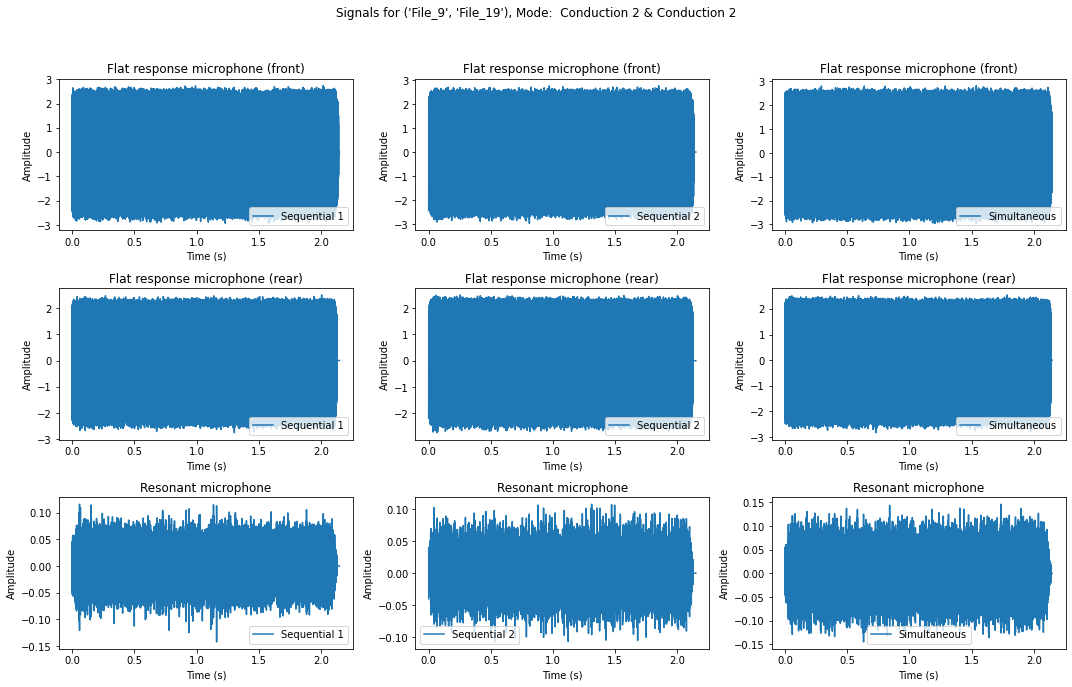

Processing key: ('File_29', 'File_39'), mode:  Conduction 2 & Conduction 2


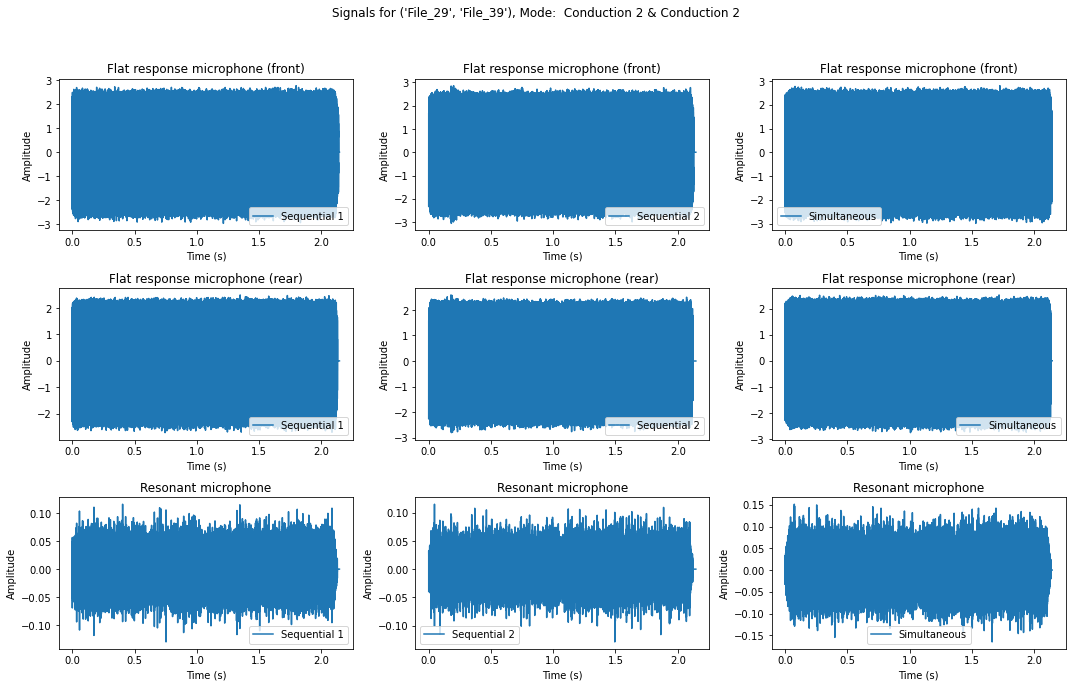

Processing key: ('File_49', 'File_64'), mode:  Conduction1 & Conduction1


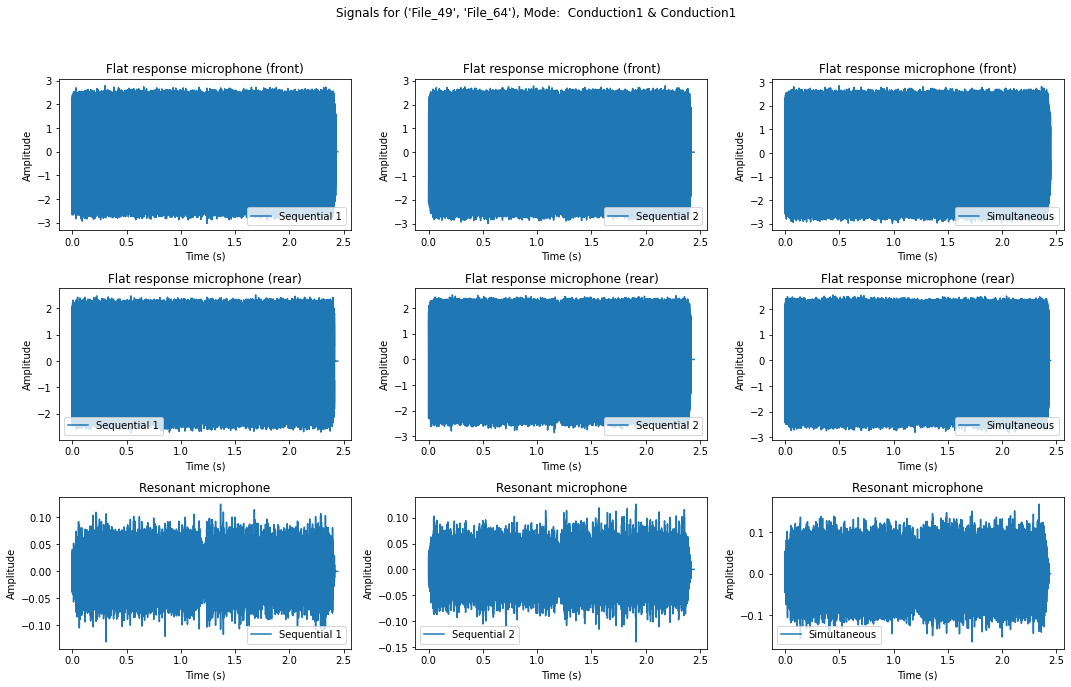

Processing key: ('File_74', 'File_89'), mode:  Conduction2 & Conduction2


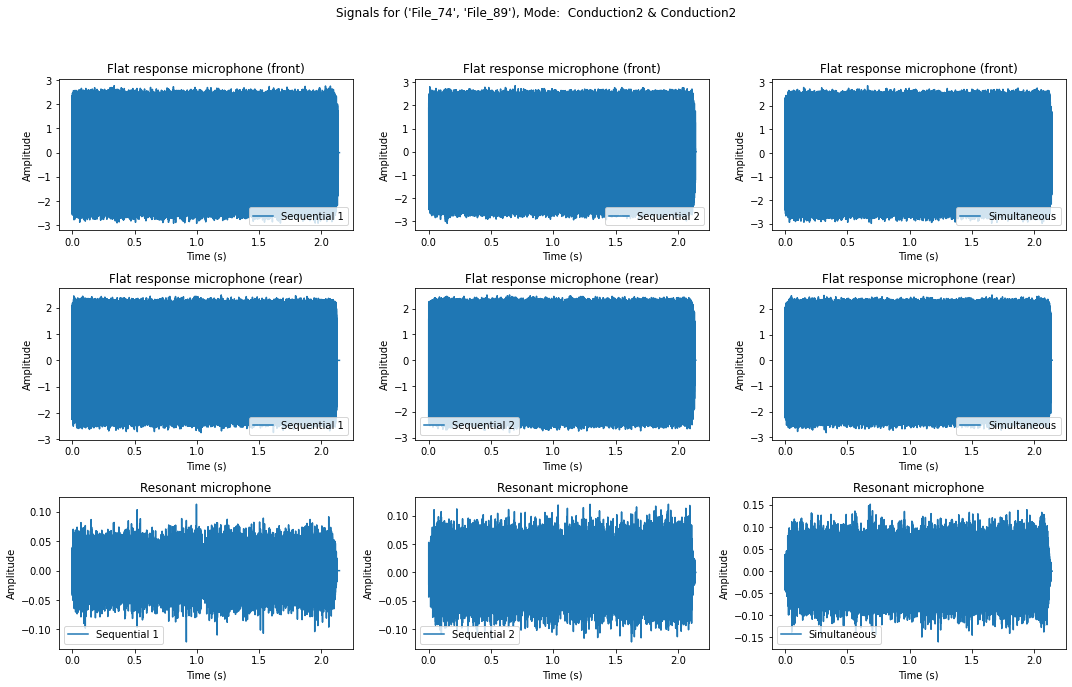

Processing key: ('File_84', 'File_99'), mode:  Conduction2 & Conduction2


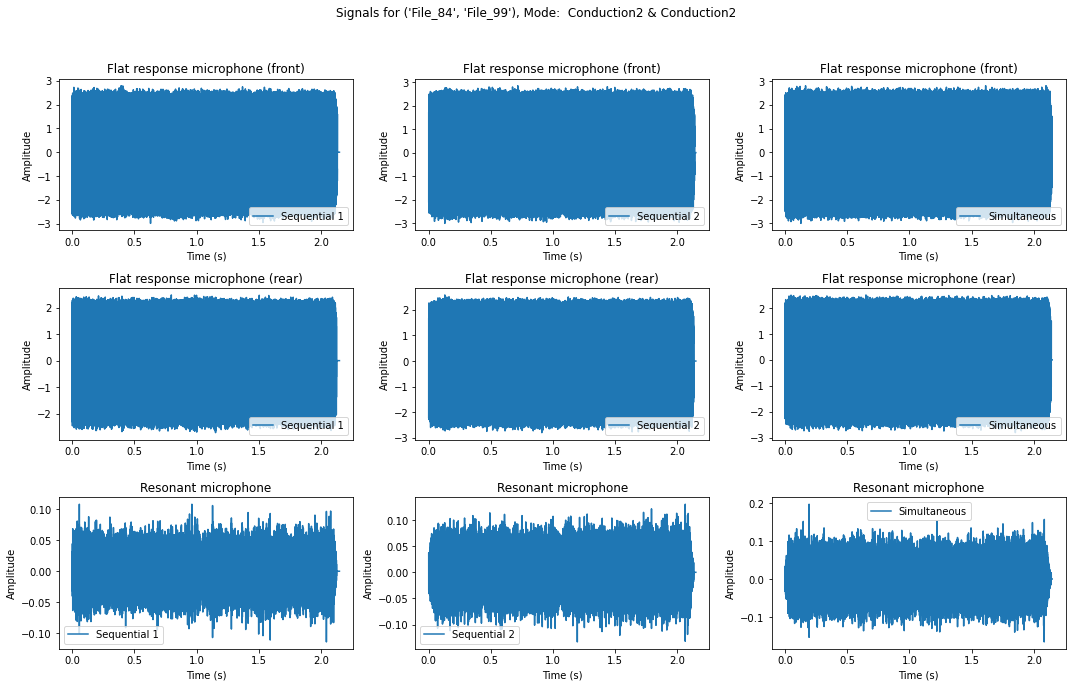

Processing key: ('File_109', 'File_124'), mode:  Conduction3 & Conduction3


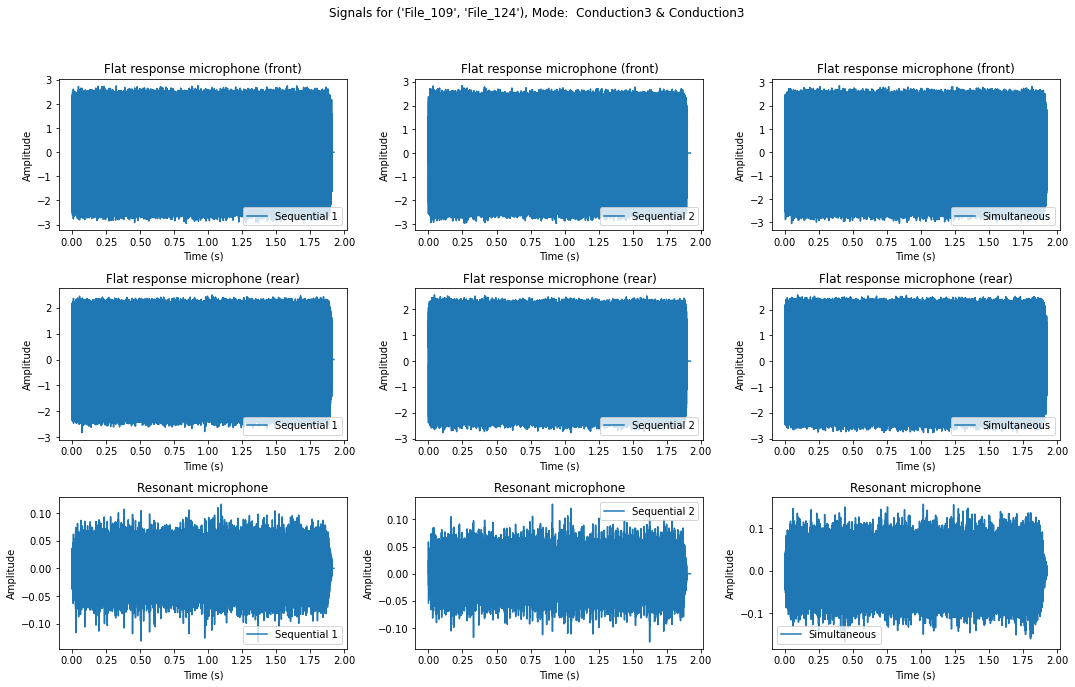

Processing key: ('File_134', 'File_149'), mode:  Conduction1 & Keyhole1


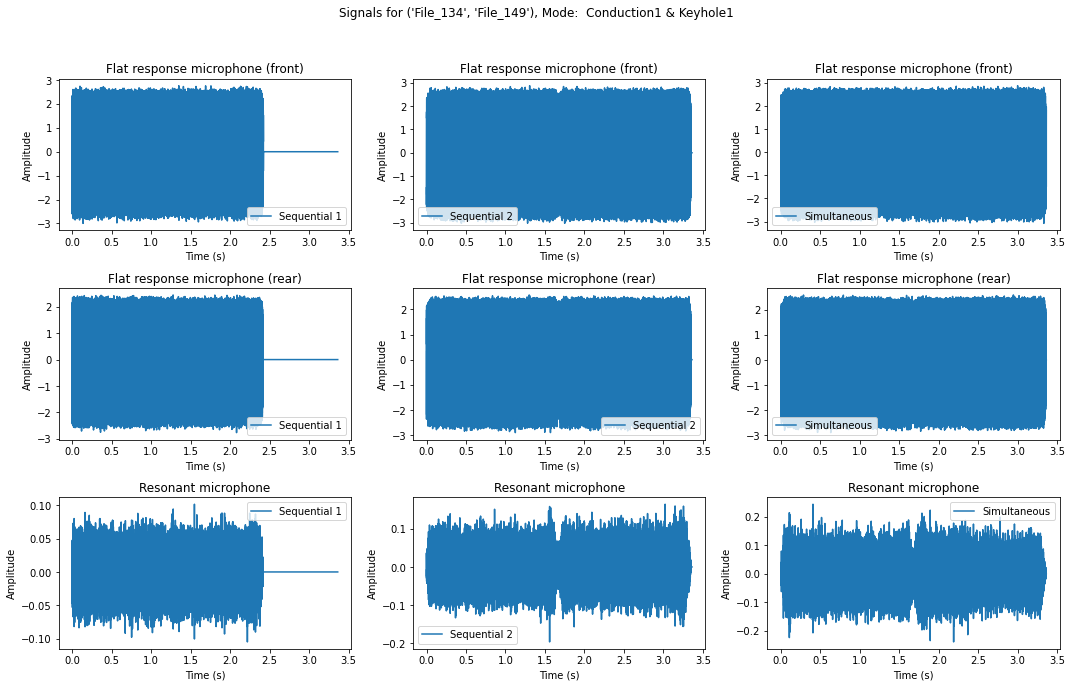

Processing key: ('File_144', 'File_159'), mode:  Conduction1 & Keyhole1


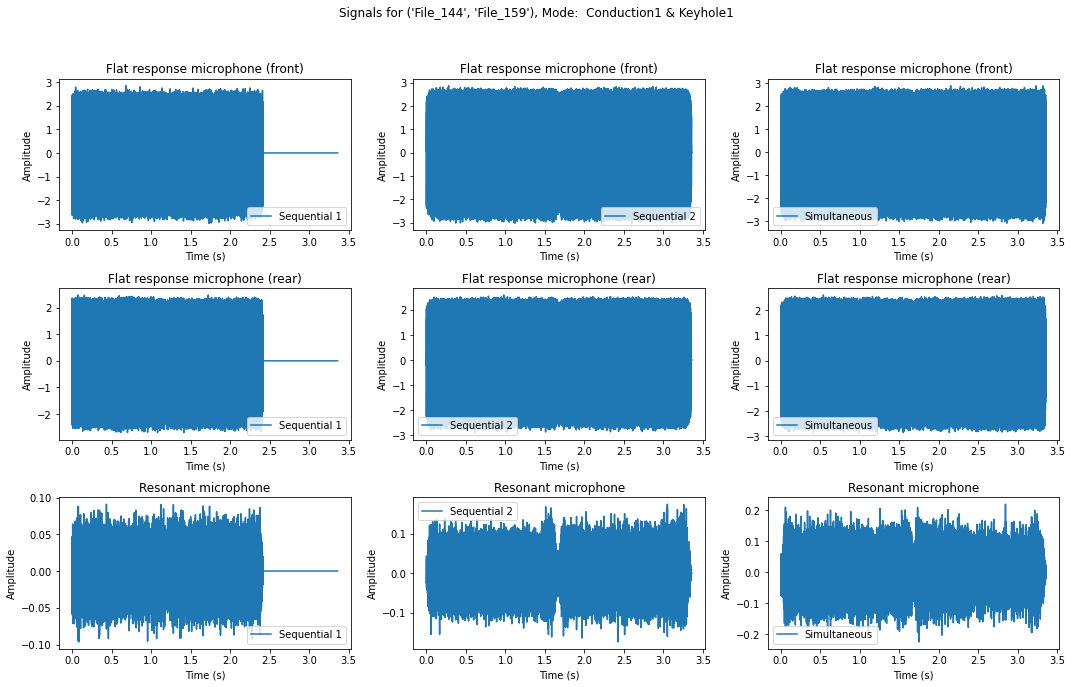

Processing key: ('File_169', 'File_184'), mode:  Keyhole1 & Conduction1


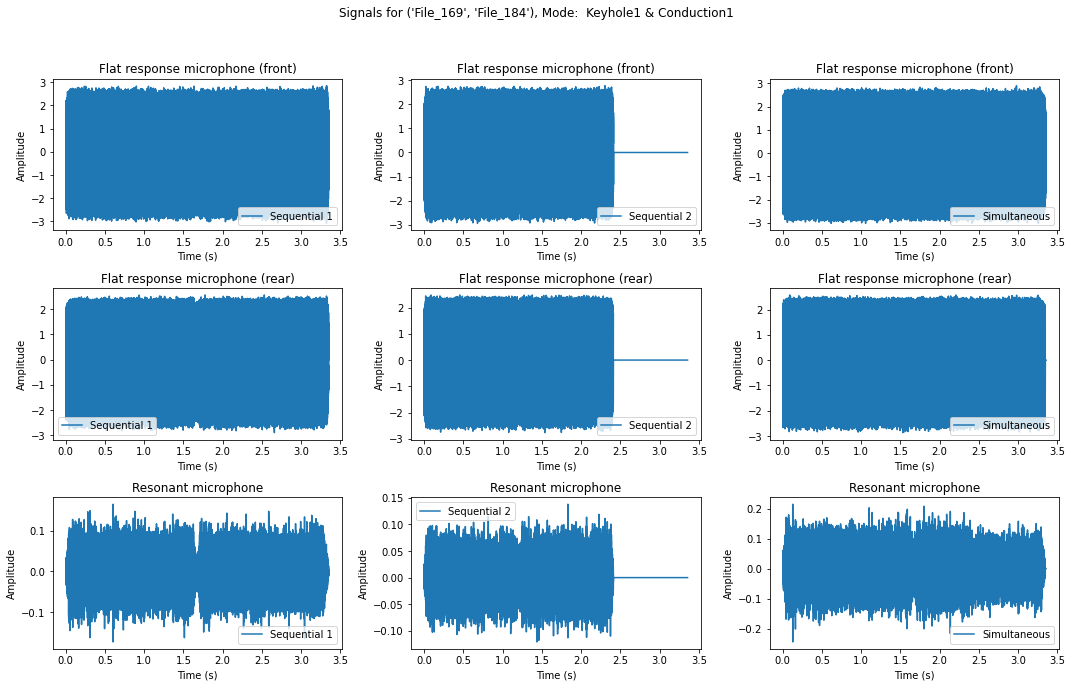

Processing key: ('File_194', 'File_209'), mode:  Conduction2 & Keyhole2


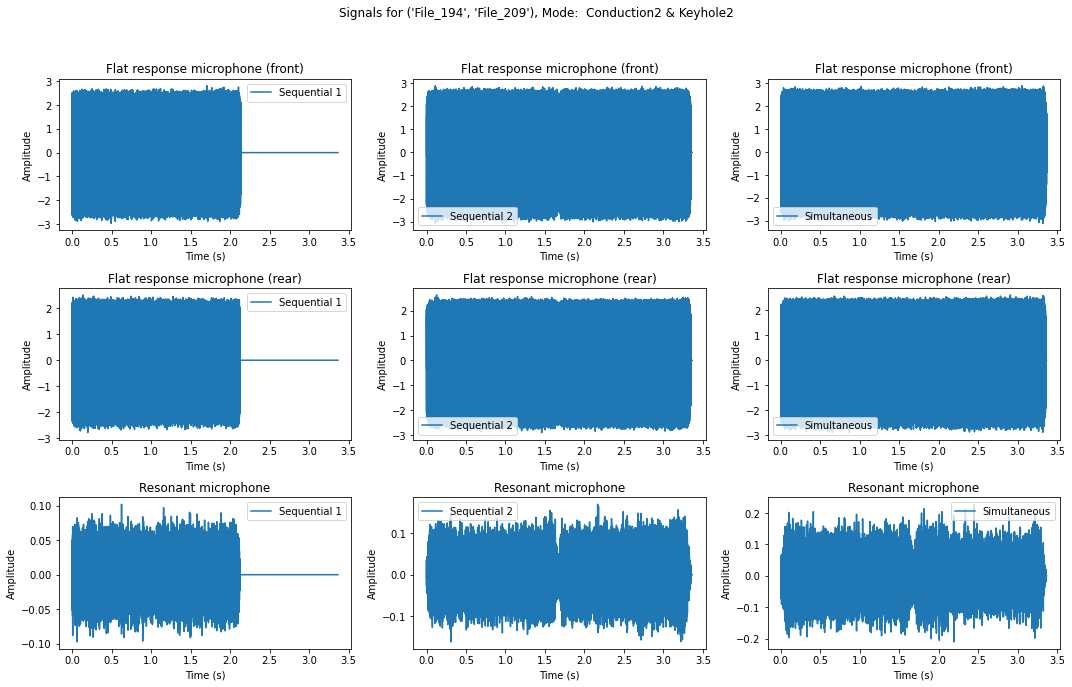

Processing key: ('File_204', 'File_219'), mode:  Conduction2 & Keyhole2


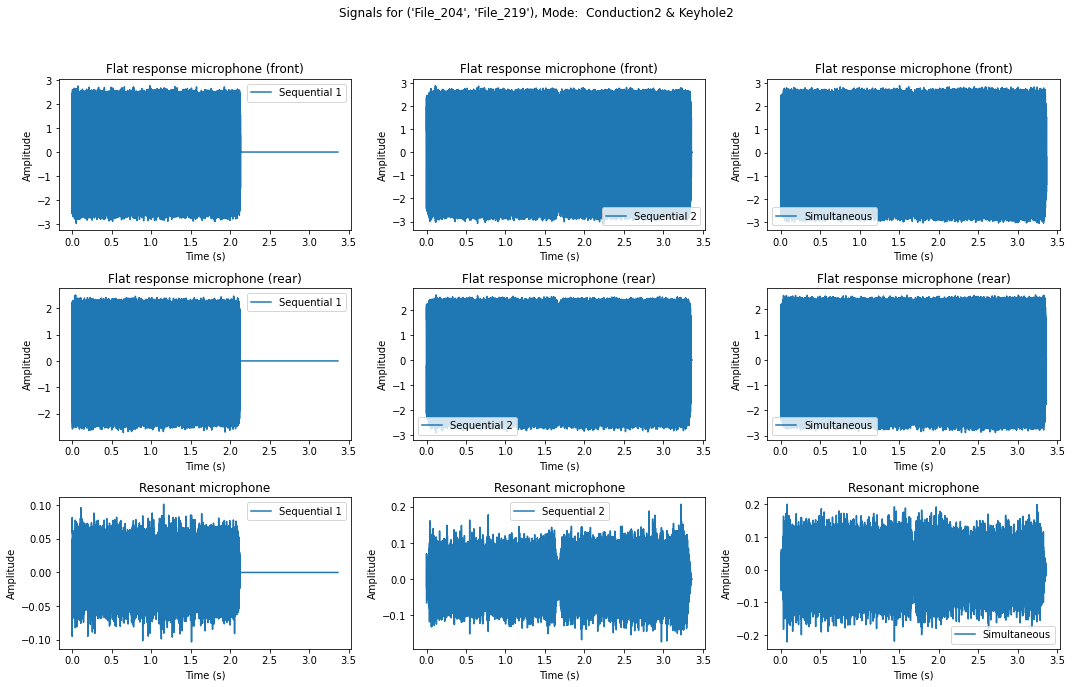

Processing key: ('File_229', 'File_244'), mode:  Keyhole2 & Conduction2


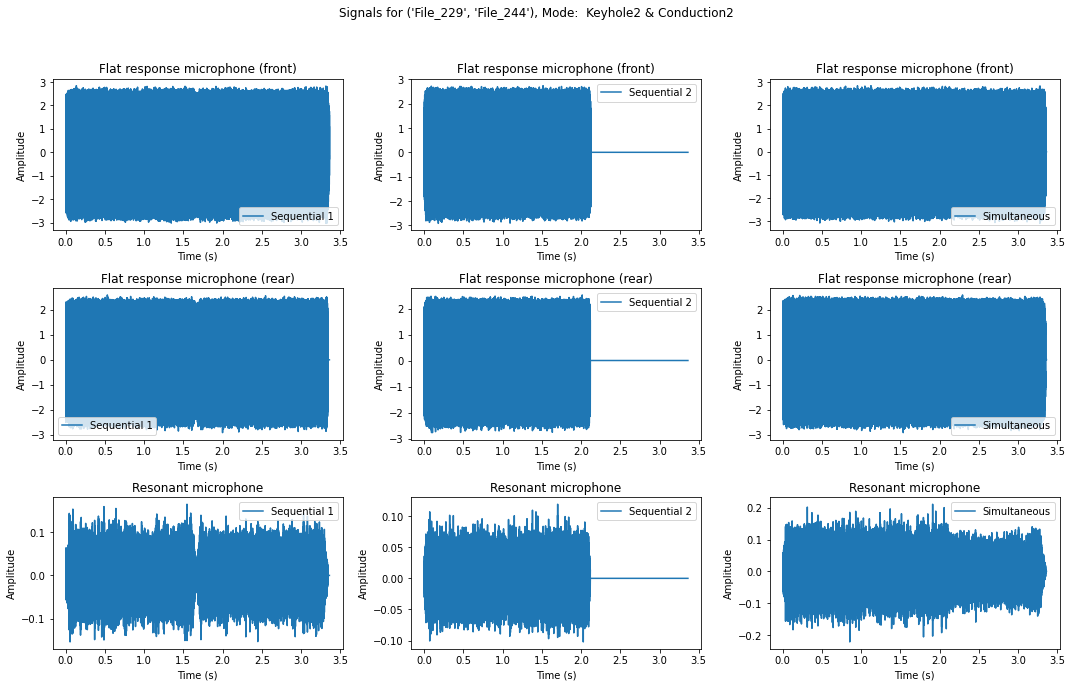

Processing key: ('File_254', 'File_269'), mode:  Conduction3 & Keyhole3


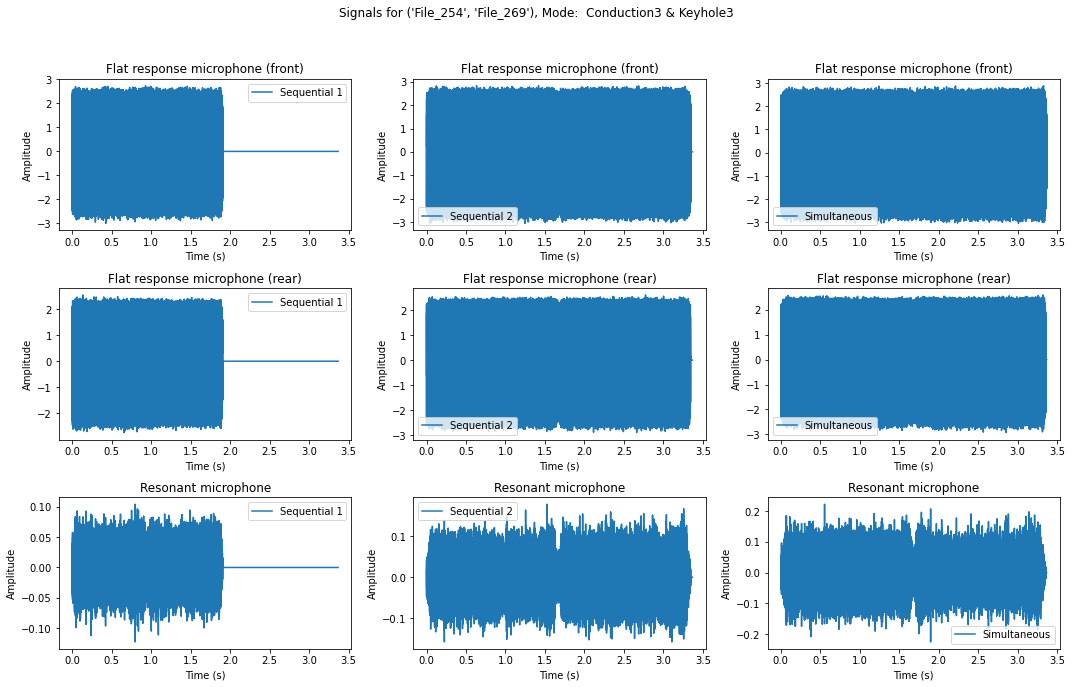

Processing key: ('File_264', 'File_279'), mode:  Conduction3 & Keyhole3


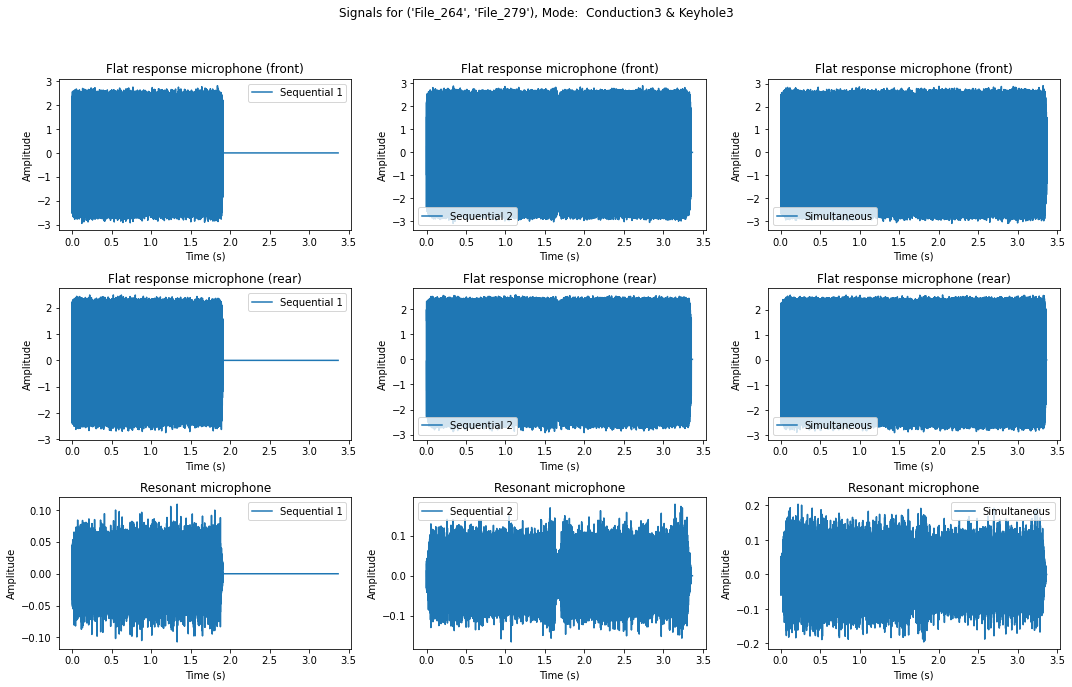

Processing key: ('File_289', 'File_304'), mode:  Keyhole3 & Conduction3


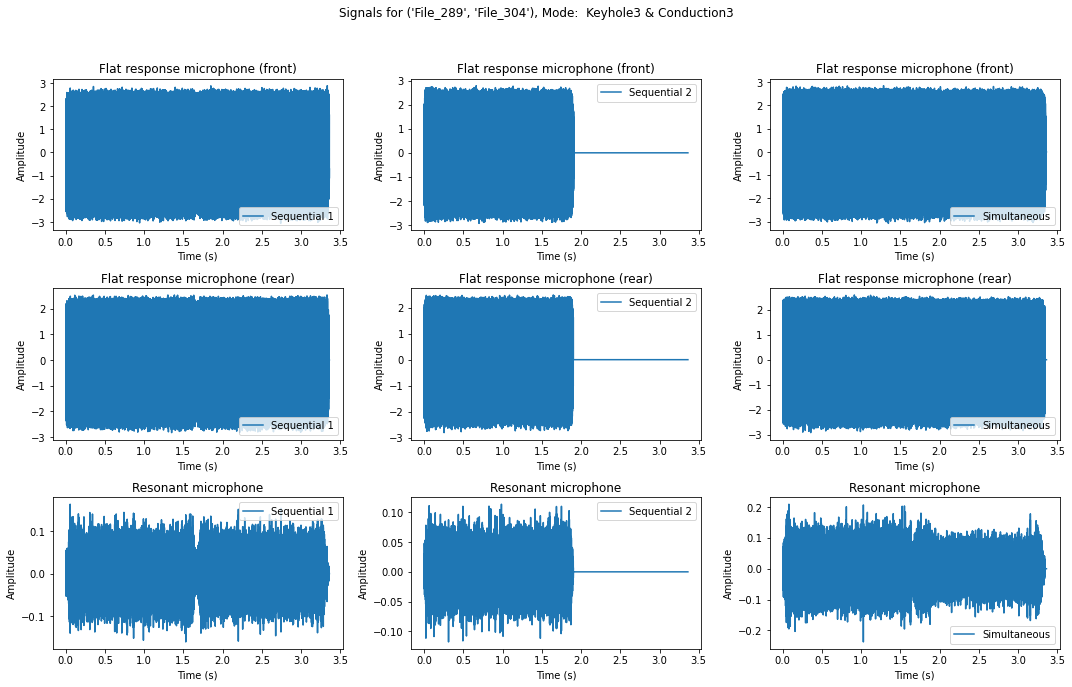

Processing key: ('File_314', 'File_329'), mode:  Keyhole1 & Keyhole1


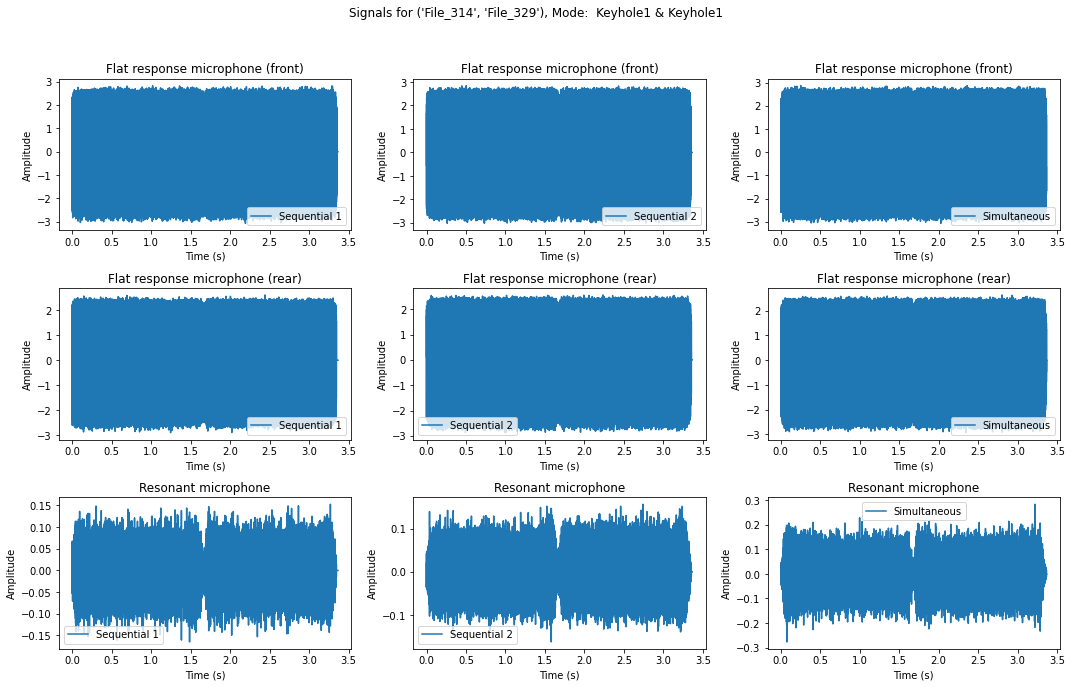

Processing key: ('File_324', 'File_339'), mode:  Keyhole1 & Keyhole1


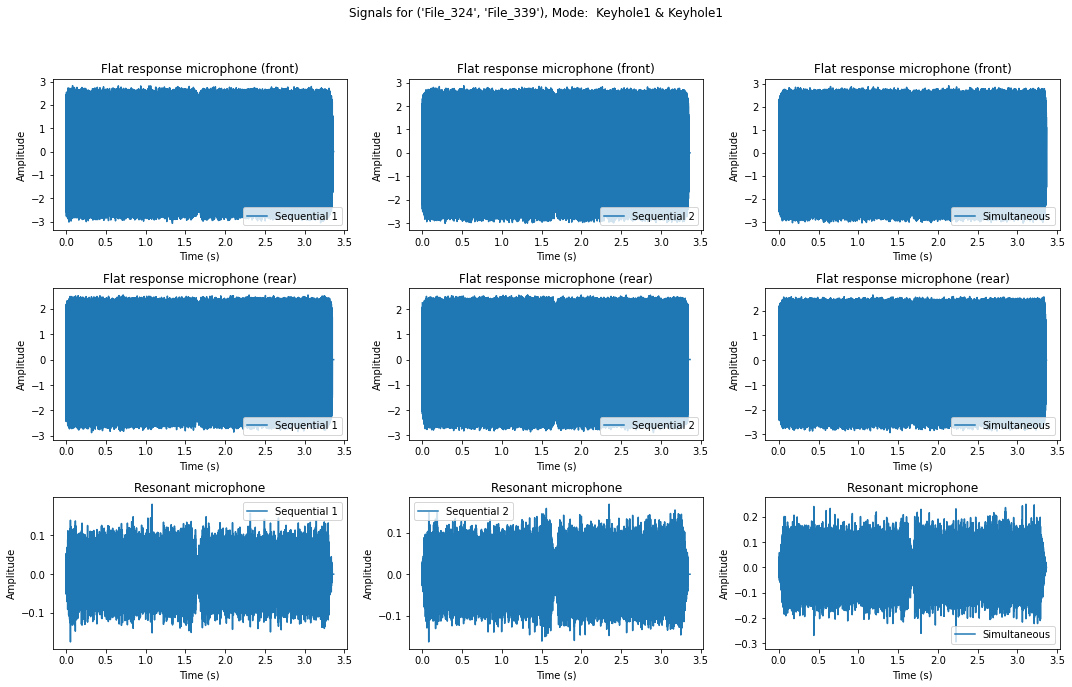

Processing key: ('File_349', 'File_364'), mode:  Keyhole2 & Keyhole2


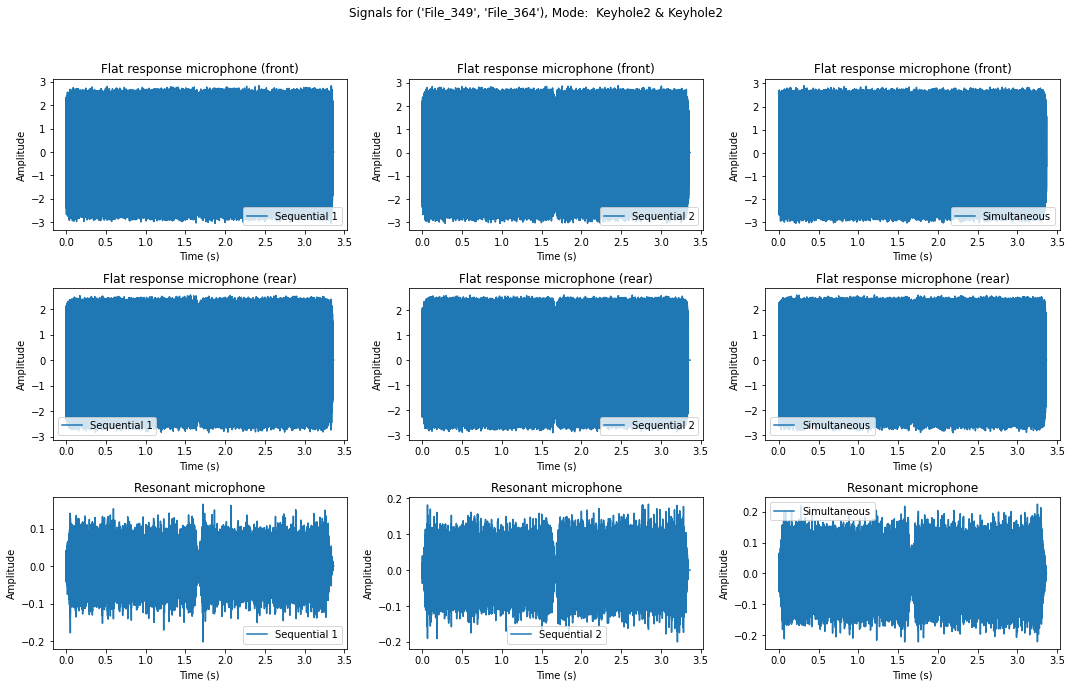

Processing key: ('File_374', 'File_389'), mode:  Keyhole3 & Keyhole3


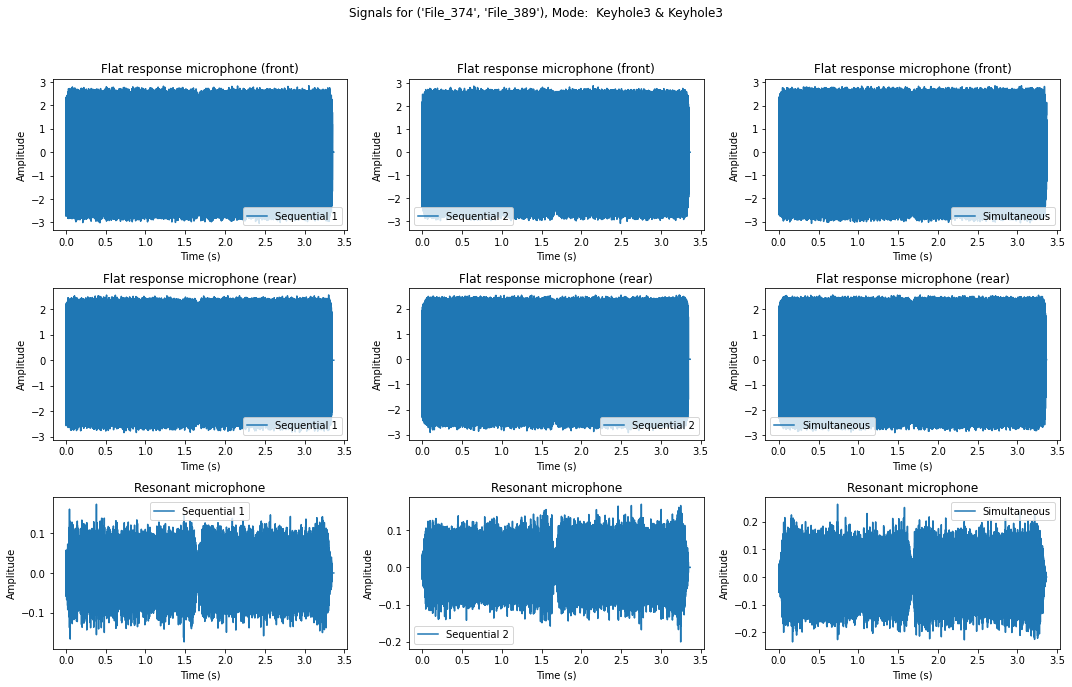

Processing key: ('File_384', 'File_399'), mode:  Keyhole3 & Keyhole3


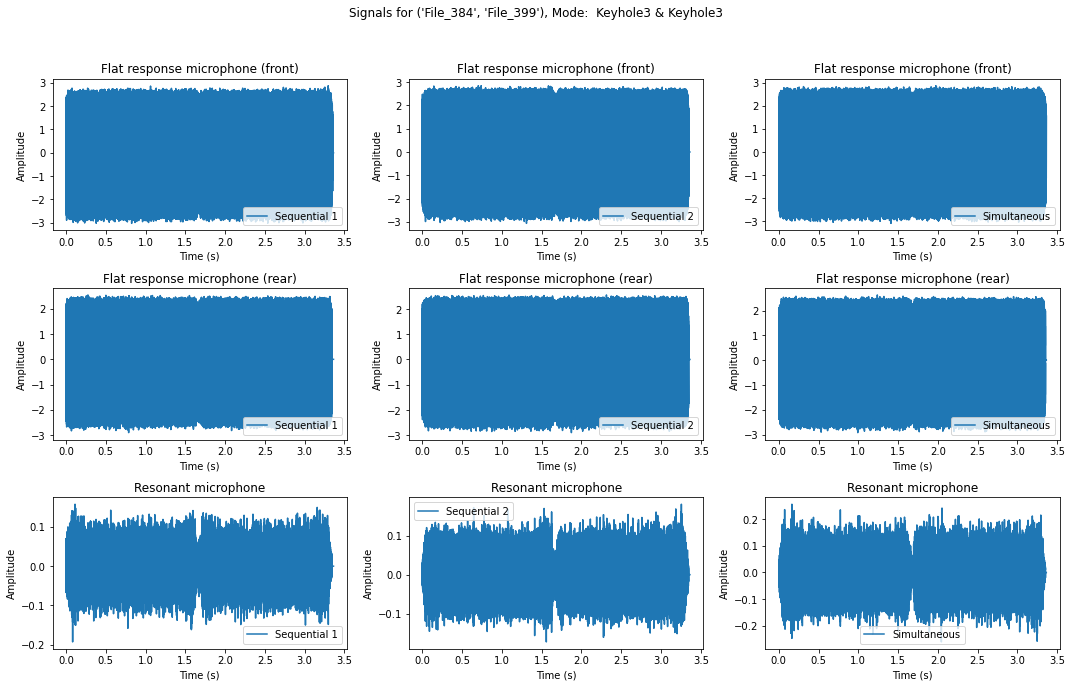

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Channel names based on the given descriptions
channel_names = {
    0: "Flat response microphone (front)",
    1: "Flat response microphone (rear)",
    2: "Resonant microphone"
}

# Sampling frequency
Fs = 200000  # 200kHz
key_counter = 0

for key, data in pytorch_database.items():
    key_counter += 1
    
    if key_counter % 10 == 0:
        # For every 10th key, plot the signals
        print(f"Processing key: {key}, mode: {data['mode']}")
        
        seq_tensor = data['sequential']
        sim_tensor = data['simultaneous']
        
        # All signals have the same number of samples, calculate time vector from one of them
        N = seq_tensor.shape[2]  # Number of samples in each signal
        time_vector = np.linspace(0, N / Fs, N, endpoint=False)  # Time vector for plotting
        
        # Create subplots for each channel
        fig, axs = plt.subplots(3, 3, figsize=(15, 10))  # 3 rows for channels, 3 columns for sequential(2) + simultaneous(1)
        fig.suptitle(f"Signals for {key}, Mode: {data['mode']}")
        
        for channel_idx in range(3):  # Assuming 3 channels as per description
            channel_name = channel_names[channel_idx]
            
            # Plot sequential signals
            axs[channel_idx, 0].plot(time_vector, seq_tensor[0, channel_idx, :].numpy(), label="Sequential 1")
            axs[channel_idx, 1].plot(time_vector, seq_tensor[1, channel_idx, :].numpy(), label="Sequential 2")
            
            # Plot simultaneous signal
            axs[channel_idx, 2].plot(time_vector, sim_tensor[0, channel_idx, :].numpy(), label="Simultaneous")
            
            for ax in axs[channel_idx]:
                ax.set_title(channel_name)
                ax.set_xlabel("Time (s)")
                ax.set_ylabel("Amplitude")
                ax.legend()
        
        # Adjust layout to prevent overlap
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        
        plt.show()
        


In [14]:
torch.save(pytorch_database, './Data/torch_data')